
## Klasifikasi Bunga Iris 

In [10]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [11]:
columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df = pd.read_csv(r'H:\CODING\semester-6\JST\iris.data', names=columns)

In [12]:
# statistik deskritif data 
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Sampel Data 
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


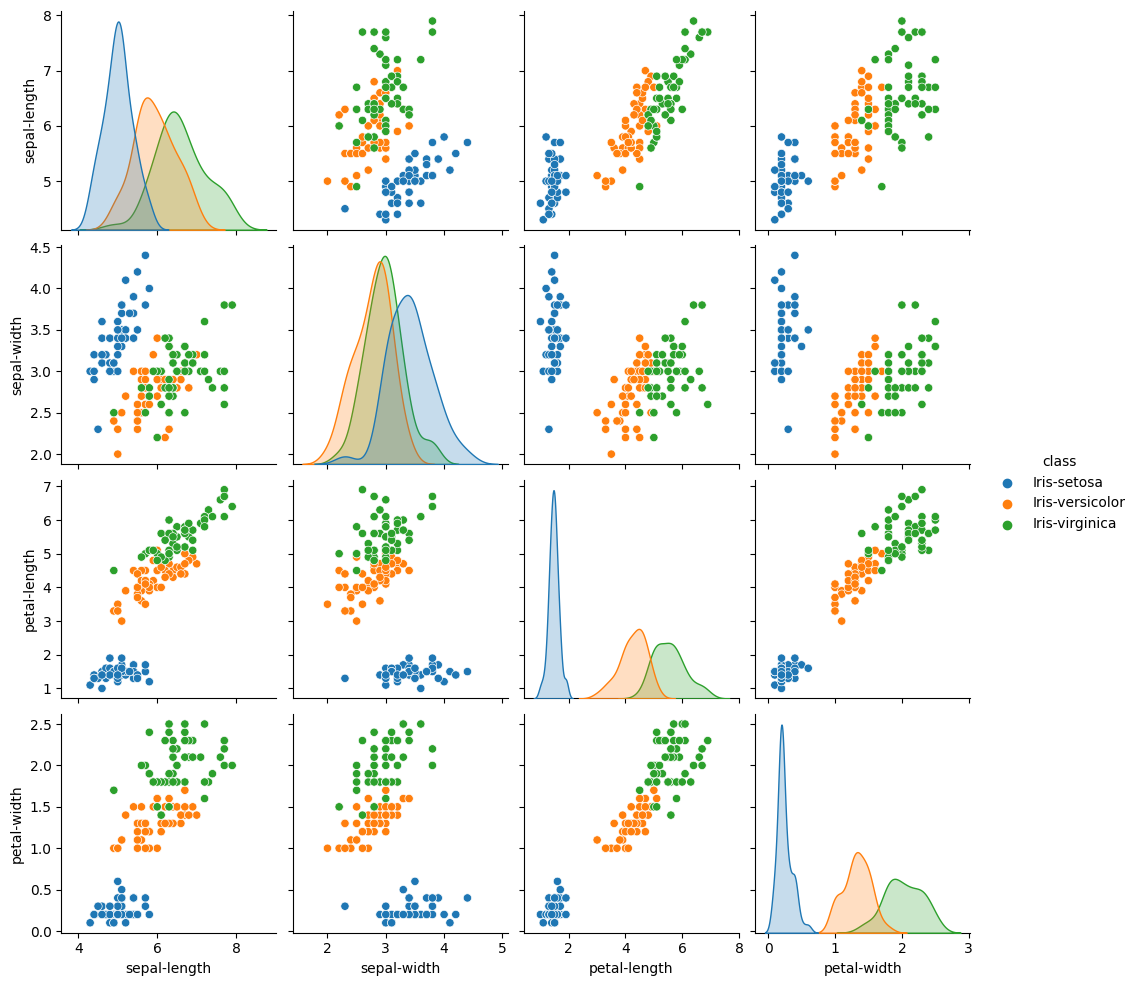

In [14]:
# pair Plot 
# membantu memvisualisasikan hubungan antar variabel pada dataset
sns.pairplot(df, hue='class')


In [15]:
# preprocessing 
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Pisahkan data training, data testing, label training, label
# testing (biasanya: 2/3 data training, 1/3 data testing)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [17]:
# Label Encoding 
# Karena kelas dari dataset ini berupa teks, maka perlu dilakukan encoding.
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [18]:
# Standarisasi 
# Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

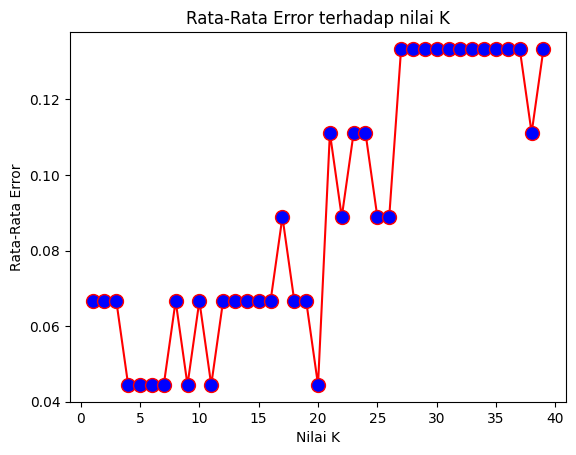

In [19]:
# menemukan nilai konstanta K 
#  bahwa KNN membutuhkan suatu nilai konstanta $k$ untuk menentukan berapa banyak tetangga yang akan digunakan oleh model. Kode di bawah ini akan melakukan training sebanyak 4o kali dengan nilai $k$ dari 1 hingga 40.
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [20]:
# Training 
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.90      1.00      0.95        18

       accuracy                           0.96        45
      macro avg       0.97      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

